In [1]:
import madx.optics_parameters as mop
import madx.madx_configuration as mc
import approximator.optics_parameters as aop
import approximator.runner as ap_runner
import data.bunch_configuration as buc
import visualization.optics_parameter_visualisation as opv
import numpy as np
import matplotlib.pyplot as plt
import sys
import seaborn as sns
import ROOT
from ROOT import gSystem, gInterpreter
import data.bunch_configuration as buc

sns.set_style("whitegrid")

Welcome to JupyROOT 6.16/00


In [2]:
sys.path.append("/home/rafalmucha/Pobrane/optic/optics_generator_python/src")
path_to_configuration = "/home/rafalmucha/Pobrane/optic/2016/"
path_to_xml_file = "/home/rafalmucha/Pobrane/optic/2016/configuration_reconst_beam1.xml"
item_number = 2
madx_configuration = mc.MadxConfiguration(path_to_xml_file, item_number, path_to_configuration)

In [3]:
home = "/home/rafalmucha/Pobrane/optic/"
file_name = "parametrization_6500GeV_0p4_185_reco"
approximator_name = "ip5_to_station_220_h_2_lhcb1"
path_to_project = home+"/optics_generator_python"
path_to_file = home+"/2016/" + file_name + ".root"

In [4]:
approximator = ap_runner.get_approximator(path_to_project, path_to_file, approximator_name)

Error in <TCling::RegisterModule>: cannot find dictionary module FitCint_rdict.pcm


In [5]:
# Parameters of bunch
x_mean = 0.0
sigma_x = 0
theta_x_mean = 0
sigma_theta_x = 0
y_mean = 0.0
sigma_y = 0
theta_y_mean = 0.00
sigma_theta_y = 0
pt_mean = -0.15
sigma_pt = 0.2

number_of_x_values = 1
number_of_theta_x_values = 1
number_of_y_values = 1
number_of_theta_y_values = 1
number_of_pt_values = 100

In [6]:
subtitle = file_name + "\n" + approximator_name
plot_size = 5
grid_x_resolution = 5
grid_y_resolution = 7

In [7]:
bunch_configuration = buc.BunchConfiguration.from_sigma(x_mean, sigma_x, number_of_x_values,
                                                        theta_x_mean, sigma_theta_x, number_of_theta_x_values,
                                                        y_mean, sigma_y, number_of_y_values,
                                                        theta_y_mean, sigma_theta_y, number_of_theta_y_values,
                                                        pt_mean, sigma_pt, number_of_pt_values)

-0.35
[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.50438135e-01
   0.00000000e+00  6.50000000e+03]
 [ 2.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.46397731e-01
   0.00000000e+00  6.50000000e+03]
 [ 3.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.42357327e-01
   0.00000000e+00  6.50000000e+03]
 [ 4.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.38316923e-01
   0.00000000e+00  6.50000000e+03]
 [ 5.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.34276519e-01
   0.00000000e+00  6.50000000e+03]
 [ 6.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.30236115e-01
   0.00000000e+00  6.500000

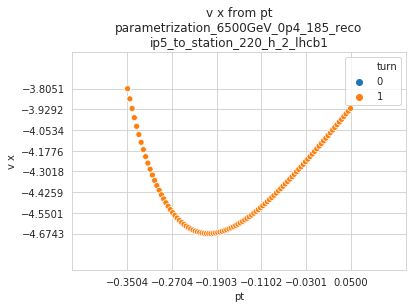

In [8]:
opv.plot_optical_functions(bunch_configuration, madx_configuration, mop.compute_v_x, approximator, aop.compute_v_x, "pt", "v x", subtitle)

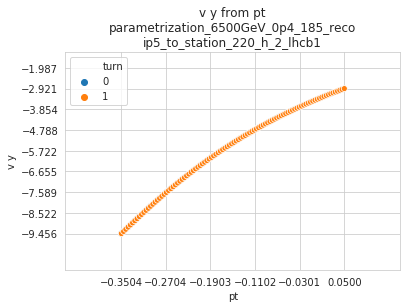

In [9]:
opv.plot_optical_functions(bunch_configuration, madx_configuration, mop.compute_v_y, approximator, aop.compute_v_y, "pt", "v y", subtitle)

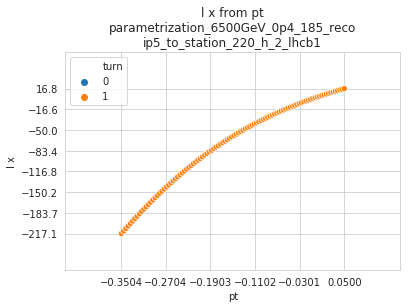

In [10]:
opv.plot_optical_functions(bunch_configuration, madx_configuration, mop.compute_l_x, approximator, aop.compute_l_x, "pt", "l x", subtitle)

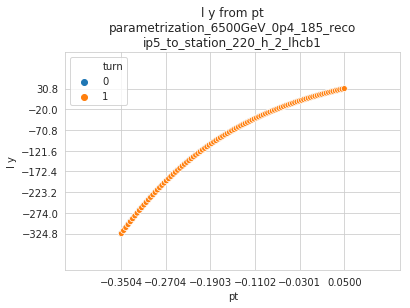

In [11]:
opv.plot_optical_functions(bunch_configuration, madx_configuration, mop.compute_l_y, approximator, aop.compute_l_y, "pt", "l y", subtitle)

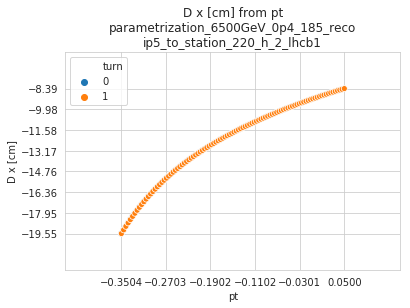

In [12]:
opv.plot_optical_functions(bunch_configuration, madx_configuration, mop.compute_d_x, approximator, aop.compute_d_x, "pt", "D x [cm]", subtitle, y_unit_multiplier=100)

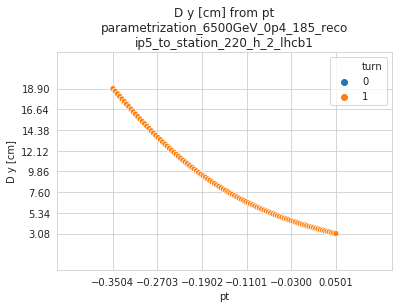

In [13]:
opv.plot_optical_functions(bunch_configuration, madx_configuration, mop.compute_d_y, approximator, aop.compute_d_y, "pt", "D y", subtitle, y_unit=" [cm]", y_unit_multiplier=100)